In [1]:
%%time
from datetime import datetime
a = datetime.now()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_palette("afmhot")
# sns.set_palette("twilight")
# sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')


CPU times: total: 1.64 s
Wall time: 1.89 s


In [2]:
%%time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Input, Activation
import tensorflow.keras as tfk

CPU times: total: 2.97 s
Wall time: 3.29 s


In [3]:
import sklearn.datasets
cancer=sklearn.datasets.load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
y = cancer['target']

df['classification'] = y
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,classification
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


In [6]:
# 212 - Malignant ~ 0
# 357 - Benign ~ 1

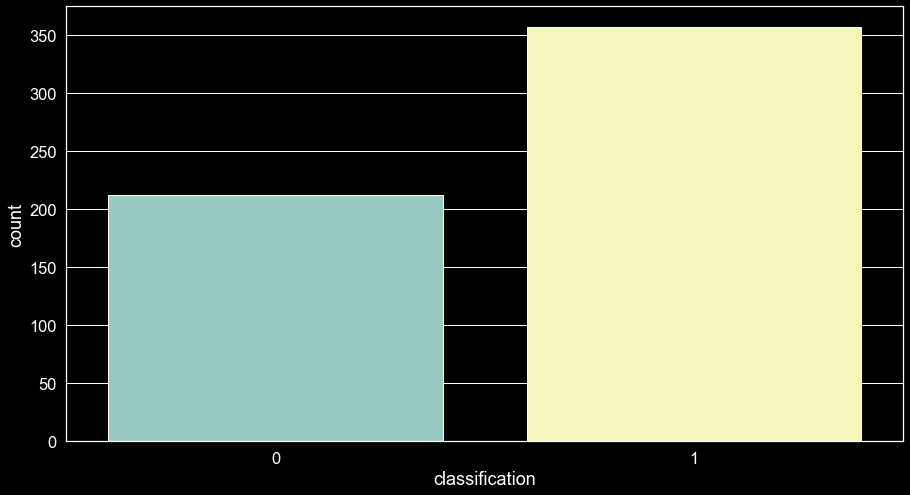

In [7]:
df['classification'].value_counts()
sns.countplot(data=df,x=df['classification']);

In [8]:
df['classification']= df['classification'].apply(lambda x : 1 if x==0 else 0)

<AxesSubplot:>

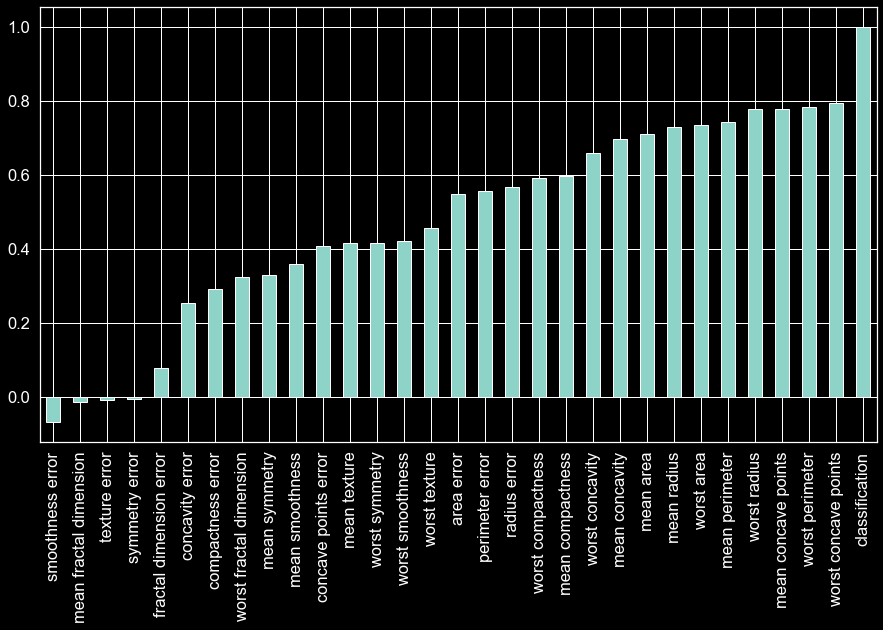

In [9]:
# df.corr()['classification'].sort_values().plot(kind='bar')

In [10]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()

In [13]:
target='classification'
y=df[target].values
# X = df.loc[df.columns != target]
X = df.loc[:,df.columns != target].values


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=318)

In [19]:
model = Sequential()
model.add(Dense(500, input_dim=30,activation='relu'))

model.add(Dense(1000,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
# model.add(Dense(30,input_dim=30,activation='relu'))
# model.add(Dense(30,activation='relu'))
# model.add(Dense(1,activation='sigmoid'))

In [21]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [22]:
%%time
model.fit(X_train,y_train, epochs=450,validation_data=(X_test,y_test),verbose=0)

CPU times: total: 45.8 s
Wall time: 33 s


In [23]:
hist = model.history.history

In [24]:
pd.DataFrame(hist)

,loss,accuracy,val_loss,val_accuracy
0,34.389488,0.575117,16.984283,0.426573
1,6.900827,0.730047,1.315399,0.909091
2,1.986688,0.889671,0.811095,0.909091
3,1.291094,0.889671,1.526864,0.839161
4,1.817935,0.880282,1.370225,0.902098
...,...,...,...,...
445,0.089128,0.962441,0.143161,0.937063
446,0.069725,0.969484,0.062394,0.979021
447,0.051068,0.978873,0.071647,0.979021
448,0.075475,0.967136,0.075273,0.979021


In [25]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 8ms/step - loss: 0.0639 - accuracy: 0.9790


[0.06386378407478333, 0.9790209531784058]

<AxesSubplot:>

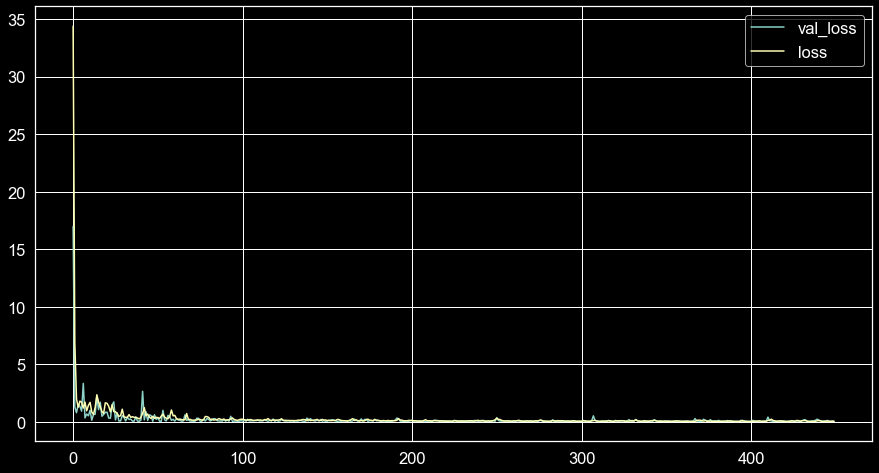

In [43]:
pd.DataFrame(hist)[['val_loss','loss']].plot()

In [27]:
pred = model.predict(X_test)

In [28]:
final = pd.DataFrame(pred, columns=['logit'])

In [29]:
final['binary']=final['logit'].apply(lambda x:1 if x>=0.50 else 0)

In [30]:
final['binary'].values

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [31]:
y_test

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,final['binary'].values))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        82
           1       0.97      0.98      0.98        61

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [35]:
display(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               15500     
                                                                 
 dense_4 (Dense)             (None, 1000)              501000    
                                                                 
 dense_5 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 517,501
Trainable params: 517,501
Non-trainable params: 0
_________________________________________________________________


None

In [77]:
print(datetime.now() - a)

0:00:56.521882
